In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


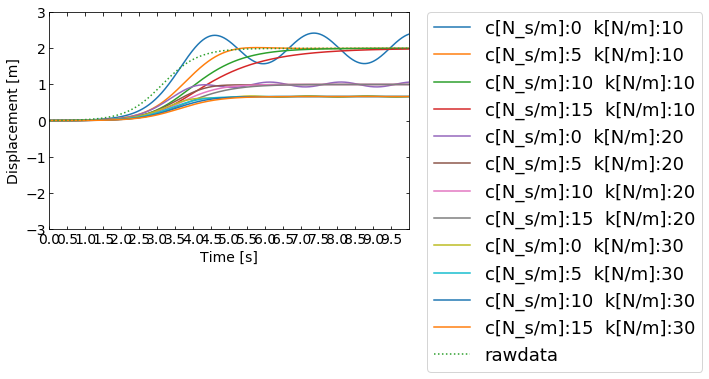

In [2]:

# mkc force system
# def func(state,t, m, k, c, A, f):
def func(state,t, m, k, c, A ):
    x1,x2  = state    
    dx2dt = - (c/m) * x2 - (k/m) * x1 + A * (math.tanh(t - np.pi) + 1)
    return [x2, dx2dt]


A = 5                         # 強制外力の振幅[N]
f = [0.4]                  # 強制外力の周波数[Hz]
state0 = [0.0, 0.0]             # 初期値[x0, v0 ,a0]

t0 = 0                          # 初期時間[s]
tf = 10                         # 終了時間[s]
dt = 0.005                      # 時間刻み[s]
t = np.arange(t0, tf+dt, dt)    # 時間軸配列
# print(t.size) #2002

for i in range(len(t)):
    sin_list = math.sin(t[i] * 2.0 * np.pi * f[0] )
    


# ここからグラフ描画
# フォントの種類とサイズを設定する。
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Times New Roman'

# 目盛を内側にする。
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# グラフの上下左右に目盛線を付ける。
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

# 軸のラベルを設定する。
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Displacement [m]')

# データの範囲と刻み目盛を明示する。
ax1.set_xticks(np.arange(0, 10, 0.5))
# ax1.set_yticks(np.arange(-1, 1, 0.1))
ax1.set_xlim(0, 10)
ax1.set_ylim(-3, 3)

# データプロット
labeling = ["f = 1[Hz]", "f = 7[Hz]", "f = 20[Hz]"]
# c_list = [""]

# for m in range(5,10,1 ):

# m = 2                         # 質量[kg]
# k = 1000                        # 剛性[N/m]
# c = 5                           # 減衰係数[N・s/m]

m = 2
for k in range(10, 31,10 ):
#     k =10
    for c in range(0,20,5):
#         c =9
        for i in range(len(f)):
#             sol = odeint(func, state0, t, args=(m, k , c, A, f[i]))
            sol = odeint(func, state0, t, args=(m, k , c, A))            
    #         ax1.plot(t, sol[:, 0], label=labeling[i])
            label_ck = "c[N_s/m]:" + str(c) + "  k[N/m]:" + str(k)
            ax1.plot(t, sol[:, 0], label=label_ck )

ax1.plot(t,(np.tanh(t - np.pi) +1) ,linestyle="dotted" , label="rawdata")

fig.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18 )

# グラフを表示する。
plt.show()
plt.close()

## diffでの vとxのチェック

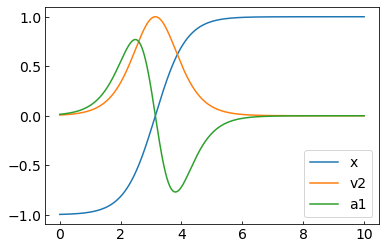

In [3]:
tf = 10
dt = 0.005

t = np.arange(t0, tf+dt, dt)    # 時間軸配列
# print(t.size) #2002

# for i in range(len(t)):
x = np.tanh(t-np.pi ) 
v1 = 1 / 2 /pow( np.cosh(t-np.pi),2 )
v2 = 1 - pow( x,2 )
a1 =  -2 * x * (1 - pow( x,2 ))


v=[]
a=[]

for i in range(len(t)-1):
    v.append(100*( x[i +1] - x[i]))

v.append(0)    

for i in range(len(t)-1):
    a.append(100*( v[i+1] - v[i]))

a.append(0)    

    
# プロット
plt.plot(t, x, label="x")
# plt.plot(t, v, label="v")
# plt.plot(t, v1, label="v1")
plt.plot(t, v2, label="v2")
plt.plot(t, a1, label="a1")
# plt.plot(t, a, label="a")


# plt.plot(t, a, label="a")


# 凡例の表示
plt.legend()

# プロット表示(設定の反映)
plt.show()

## odeintをsin cosで動作チェック

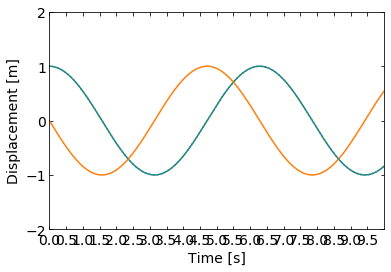

In [4]:
### https://watlab-blog.com/2019/07/03/1dof-transient-response/
#https://watlab-blog.com/2019/06/14/mck-force-vibration/


def func(state,t, m, k, c ):
    x , v = state
    a = -1 * np.cos(t)
    return v, a


state0 = [1.0, 0.0 ]             # 初期値[x0, v0 ]

t0 = 0                          # 初期時間[s]
tf = 10                         # 終了時間[s]
dt = 0.005                      # 時間刻み[s]
t = np.arange(t0, tf+dt, dt)    # 時間軸配列
# print(t.size) #2002

def diff(x):
    v = []
    for i in range(len(t)-1):
        v.append(1000*(x[i +1] - x[i]))
    v.append(0)    
    return v

# ここからグラフ描画
# フォントの種類とサイズを設定する。
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Times New Roman'

# 目盛を内側にする。
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# グラフの上下左右に目盛線を付ける。
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

# 軸のラベルを設定する。
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Displacement [m]')

# データの範囲と刻み目盛を明示する。
ax1.set_xticks(np.arange(0, tf, 0.005 *tf *10))
# ax1.set_yticks(np.arange(-1, 1, 0.1))
ax1.set_xlim(0, tf)
ax1.set_ylim(-2, 2)

# データプロット
labeling = ["f = 1[Hz]", "f = 7[Hz]", "f = 20[Hz]"]
# c_list = [""]


m = 2                         # 質量[kg]

max_a_list = []
calc_k_list =[]
calc_c_list =[]

for k in range(0, 100, 100 ):
#     k = 1
    for c in range(0, 100, 100):
#         c =1
        for i in range(len(f)):
            calc_k = k/1
            calc_c = c/1
            calc_k_list.append(calc_k)
            calc_c_list.append(calc_c)
            sol = odeint(func, state0, t, args=(m, calc_k , calc_c))            
            label_ck = "c[N_s/m]:" + str(calc_c) + "  k[N/m]:" + str(calc_k)
#             label_a = label_ck + "x"
            ax1.plot(t, sol[:, 0], label=label_ck )  # 変位量
            ax1.plot(t, sol[:, 1], label=label_ck )  # 速度量
            a = diff(sol[:, 1] )
            max_a_list.append(np.max(a))
#             ax1.plot(t,a, label = "a")  # 加速度量

ax1.plot(t,np.cos(t) ,linestyle="dotted" , label="rawdata")
# ax1.plot(t,diff(pow(t,3)) ,linestyle="dotted" , label="rawdata")


plt.show()
plt.close()

